# R squared and Mean squared error

## What is R squared?

R-squared evaluates the scatter of the data points around the fitted regression line.

It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression.

R-squared is the percentage of the dependent variable variation that a linear model explains.

![](rsquare-formula.png)

## Perfomance of the R squared model

 - 0% represents a model that does not explain any of the variations in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
 - 100% represents a model that explains all of the variations in the response variable around its mean.
 - The high the value of R-square determines the less is the difference between the actual values and the predicted values therefore the result will be efficient.

## Implementaion of R squared

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [29]:
# Taking data manually as given below
X = [57, 4, 2, 8, 9, 22, 33, 63, 56, 97, 77, 73, 83, 27, 87, 91]
Y = [56.5, 5.33, 4.21, 7.89, 9.11, 22.17, 34.67, 63.66, 57.57, 97.27, 72.21, 75.77, 83.99, 25.77, 90.67, 94.53]

# Converting X and Y to an array using numpy library and assigning it to the new variables X_new and Y_new.
X_new = np.array(X)
Y_new = np.array(Y)
X_new = X_new.reshape(-1,1)
Y_new = Y_new.reshape(-1,1)

In [8]:
# To fit the model we have used Linear Regression so that it can help to get the line which shows fitted values.
model = linear_model.LinearRegression(fit_intercept=False)
score = model.fit(X_new,Y_new)

#### Applying R_square model to the data i.e. X_new and Y_new

In [4]:
r2 = r2_score(X_new,Y_new)
print("R_sqaure for the model is: ", r2)

R_sqaure for the model is:  0.9958567823002334


### Plotting the actual and predicted values

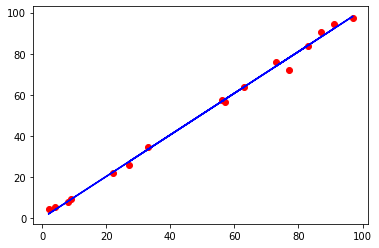

In [12]:
line = model.predict(X_new)
plt.scatter(X_new,Y_new,color='red')
plt.plot(X_new,line, color='blue')
plt.show()

As shown in the above figure that how R_squared represent the scatter arround the regression line.

We can plot fitted values by observed values.

In the above figure red dots represent the predicted values and the line represents the actual values.

### Problems with R-squared

 - We cannot use R-squared to conclude whether your model is biased.  To check for this bias, we need to check our residual plots.
 - R-squared increases every time you add an independent variable to the model. The R-squared never decreases, not even when it’s just a chance correlation between variables.
 - A regression model that contains more independent variables than another model can look like it provides a better fit merely because it contains more variables.
 - When a model contains an excessive number of independent variables and polynomial terms, it becomes overly customized to fit the peculiarities and random noise in our sample rather than reflecting the entire population.

## What is Mean Squared Error?

The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

### Implementaion of Mean Squared Error

#### Import library for Mean Squared Error

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
# Taking data manually as given below
y = [57, 4, 2, 8, 9, 22, 33, 63, 56, 97, 77, 73, 83, 27, 87, 91]
y1 = [56.5, 5.33, 4.21, 7.89, 9.11, 22.17, 34.67, 63.66, 57.57, 97.27, 72.21, 75.77, 83.99, 25.77, 90.67, 94.53]

# Converting X and Y to an array using numpy library and assigning it to the new variables X_new and Y_new.
Y_true = np.array(y)
Y_pred = np.array(y1)
Y_true = Y_true.reshape(-1,1)
Y_pred = Y_pred.reshape(-1,1)

### Method 1: Mean Squared Error using Scikit-learn Library

In [24]:
# Calculation of Mean_Squared_Error and storing it into variable i.e. mse_value.
mse_value = mean_squared_error(Y_true,Y_pred)
print("MSE value using 'sklearn.metrics': ",mse_value)

MSE value using 'sklearn.metrics':  4.484887500000003


### Method 2: Mean Squared Error using Numpy module

In [25]:
mse_np = np.square(np.subtract(Y_true,Y_pred)).mean()
print("MSE value using 'numpy': ",mse_np)

MSE value using 'numpy':  4.484887500000003


As shown above anyone can find mean suared error using any of the method on any data

### Combining implementation of R_squared and Mean_squared_error on Boston dataset

### Importing libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets

In [27]:
# Load data from sklearn boston dataset
boston_df = datasets.load_boston()
X = boston_df.data
y = boston_df.target

# Spliting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating pipeline and fitting the boston data
pipeline_df = make_pipeline(StandardScaler(), LinearRegression())
pipeline_df.fit(X_train, y_train)

# Calculating the predicted value of training and testing dataset
y_train_pred = pipeline_df.predict(X_train)
y_test_pred = pipeline_df.predict(X_test)

# Mean Squared Error
print('MSE train: %.3f, test: %.3f' %(mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)))

# R-Squared
print('R_squared train: %.3f, test: %.3f' %(r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)))

MSE train: 22.545, test: 21.517
R_squared train: 0.743, test: 0.711


# Conclusion

So, there are 2 ways to find the error i.e. R_squared and Mean_sqaured_error that varies on the condition which is better to use:

 - The similarity between mean-squared error and R-Squared is that they both are a type of metrics which are used for evaluating the performance of the regression models, especially statistical model such as linear regression model.
 - It is recommended to use R-Squared or rather adjusted R-Squared for evaluating the model performance of the regression models. This is primarily because R-Squared captures the fraction of response variance captured by the regression and tend to give better picture of quality of regression model.
 - MSE values differ based on whether the values of the response variable is scaled or not.